In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

## LOADING MNIST DATASET 

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

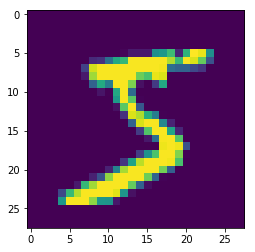

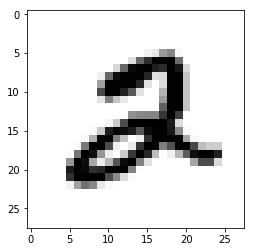

In [8]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[5], cmap=plt.cm.binary)

## Checking the values of each pixel 
# Befor normalization

In [9]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalizing the data | Pre-Processing Step 

In [11]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## After Normalizing 

In [12]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print(y_train[0])

5


## Resizing image to make it suitable for apply Convolution operation 

In [46]:
img_size = 28
x_train = np.array(x_train).reshape(x_train.shape[0], img_size, img_size, 1)
x_test = np.array(x_test).reshape(x_test.shape[0], img_size, img_size, 1)

#"-1" parameter in reshape function Causes the shape of the matrix to change 
#to a single column matrix with all values

print(f"Training Samples dimension {x_train.shape}")
print("Testing Samples dimension", x_test.shape)


Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network 

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [26]:
model = Sequential()

In [27]:
#first layer
model.add(Conv2D(64,(3,3), input_shape= x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3nd Convolution layer
model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully Connected Layer #1

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))



In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          16448     
__________

In [31]:
print(len(x_train))

60000


In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])


In [33]:
model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 56s 1ms/step - loss: 0.2829 - acc: 0.9120 - val_loss: 0.1365 - val_acc: 0.9569
Epoch 2/5
42000/42000 [==============================] - 51s 1ms/step - loss: 0.0854 - acc: 0.9739 - val_loss: 0.0918 - val_acc: 0.9742
Epoch 3/5
42000/42000 [==============================] - 47s 1ms/step - loss: 0.0596 - acc: 0.9817 - val_loss: 0.0632 - val_acc: 0.9820
Epoch 4/5
42000/42000 [==============================] - 46s 1ms/step - loss: 0.0464 - acc: 0.9855 - val_loss: 0.0642 - val_acc: 0.9804
Epoch 5/5
42000/42000 [==============================] - 45s 1ms/step - loss: 0.0364 - acc: 0.9876 - val_loss: 0.0483 - val_acc: 0.9856


# Evaluateing on testing data set MNIST 

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss on 10000 test sample", test_loss)
print("Validation Accuracy on 10000 test sample", test_acc)

10000/10000 [==============================] - 4s 432us/step
Test loss on 10000 test sample 0.038711816024850125
Validation Accuracy on 10000 test sample 0.988


In [36]:
predictions = model.predict([x_test])
print(predictions)

[[7.13272863e-09 8.51504911e-09 7.25818197e-08 ... 9.99999642e-01
  1.42901371e-08 2.07299067e-07]
 [1.66179874e-04 8.37947882e-05 9.99731600e-01 ... 3.05804042e-06
  1.56492388e-06 4.59090501e-07]
 [5.93878156e-07 9.99997258e-01 5.02822637e-08 ... 1.06398026e-07
  7.20369769e-07 3.07986525e-09]
 ...
 [1.98093386e-09 9.33289130e-07 7.10542603e-09 ... 3.85935891e-06
  1.92861608e-05 2.72519555e-05]
 [4.57686326e-07 7.94217692e-10 4.35198944e-09 ... 6.69634459e-10
  5.84658883e-05 1.79404296e-08]
 [8.72978944e-07 5.61001778e-09 6.02064574e-07 ... 1.37757372e-09
  3.76893922e-07 1.91209839e-08]]


In [37]:
print(np.argmax(predictions[0]))

7


In [56]:
img = cv2.imread("../Computer-Vision-with-Python/two.png")

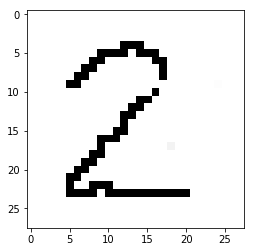

In [57]:
plt.imshow(img)

In [58]:
img.shape

(28, 28, 3)

In [59]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey.shape

(28, 28)

In [60]:
img = tf.keras.utils.normalize(grey, axis=1)

In [61]:
img = np.array(img).reshape(-1,img_size, img_size, 1)

In [62]:
img.shape

(1, 28, 28, 1)

In [63]:
predictions = model.predict(img)
print(np.argmax(predictions))

2


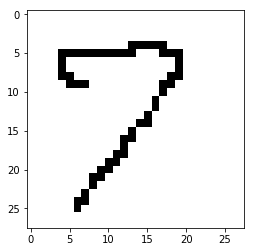

In [80]:
img = cv2.imread("../Computer-Vision-with-Python/seven.png")
plt.imshow(img)

In [81]:
img.shape

(28, 28, 3)

In [82]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey.shape

(28, 28)

In [83]:
new_img = tf.keras.utils.normalize(grey, axis=1)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)

In [84]:
new_img.shape

(1, 28, 28, 1)

In [85]:
predictions = model.predict(new_img)
print(np.argmax(predictions))

7
